In [1]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [2]:
coon = sqlite3.connect("../data/adult.db")
df = pd.read_sql_query('''select * from adult;''', coon)

In [49]:
df.dropna(inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135666 entries, 0 to 146525
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_adult        135666 non-null  int64 
 1   age             135666 non-null  int64 
 2   workclass       135666 non-null  object
 3   fnlwgt          135666 non-null  int64 
 4   education       135666 non-null  object
 5   education_num   135666 non-null  int64 
 6   marital_status  135666 non-null  object
 7   occupation      135666 non-null  object
 8   relationship    135666 non-null  object
 9   race            135666 non-null  object
 10  sex             135666 non-null  object
 11  capital_gain    135666 non-null  int64 
 12  capital_loss    135666 non-null  int64 
 13  hours_per_week  135666 non-null  int64 
 14  native_country  135666 non-null  object
 15  class           135666 non-null  object
dtypes: int64(7), object(9)
memory usage: 17.6+ MB


In [55]:
df.describe()

,ID_adult,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,135666.000000,135666.000000,1.356660e+05,135666.000000,135666.000000,135666.000000,135666.000000
mean,73276.151563,38.545973,1.897330e+05,10.118460,1101.430344,88.595418,40.936690
std,42296.349161,13.220199,1.056409e+05,2.552862,7506.374753,404.953107,12.008628
min,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,36631.250000,28.000000,1.173870e+05,9.000000,0.000000,0.000000,40.000000
50%,73313.000000,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,109890.750000,47.000000,2.379280e+05,13.000000,0.000000,0.000000,45.000000
max,146526.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
sexo = dict(df['sex'].value_counts())

In [6]:
print(f"na tabela, temos no total {df.shape[0]} registro, {sexo['male']} sao homens, representando {round((sexo['male']/df.shape[0])*100, 2)}%" + 
f" e mulheres representam {round((sexo['female']/df.shape[0])*100, 2)}%, total de {sexo['female']}")

na tabela, temos no total 146526 registro, 97950 sao homens, representando 66.85% e mulheres representam 33.15%, total de 48576


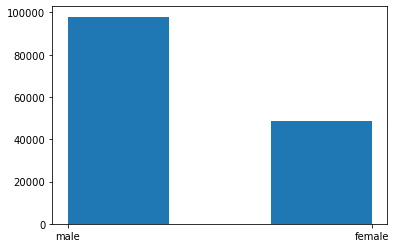

In [7]:
plt.hist(df['sex'], bins=3)
plt.show() 

In [8]:
clase = dict(df['class'].value_counts())

In [9]:
clase

{'<=50k': 111465, '>50k': 35061}

In [10]:
f"na tabela, {clase['<=50k']} ({round((clase['<=50k']/df.shape[0])*100, 2)}%) tem uma renda inferior a 50 mil dolares, e apenas {clase['>50k']} ({round((clase['>50k']/df.shape[0])*100, 2)}%) uma renda superior a 50 mil"

'na tabela, 111465 (76.07%) tem uma renda inferior a 50 mil dolares, e apenas 35061 (23.93%) uma renda superior a 50 mil'

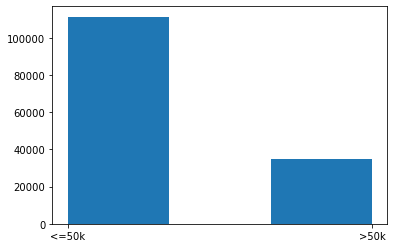

In [11]:
plt.hist(df['class'], bins=3)
plt.show() 

In [12]:
mulheres = df[(df['sex'] == "female") & (df['class'] == ">50k")]

In [13]:
homens = df[(df['sex'] == "male") & (df['class'] == ">50k")]

In [14]:
f"{mulheres.shape[0]} mulheres ({round((mulheres.shape[0]/clase['>50k'])*100, 2)}%) tem uma renda superior a 50 mil"

'5307 mulheres (15.14%) tem uma renda superior a 50 mil'

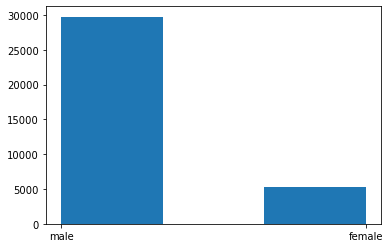

In [15]:
plt.hist(df[df['class'] == ">50k"]["sex"], bins=3)
plt.show() 

In [16]:
brancos = df[(df['class'] == ">50k") & (df['race'] == "white")]

In [17]:
f"nos dados, {brancos.shape[0]} ({round((brancos.shape[0]/clase['>50k'])*100, 2)}%) brancos representao uma renda maior que 50 mil"

'nos dados, 31821 (90.76%) brancos representao uma renda maior que 50 mil'

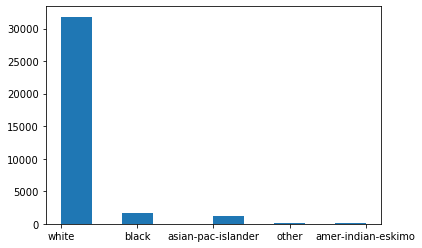

In [18]:
plt.hist(df[df['class'] == ">50k"]["race"])
plt.show() 

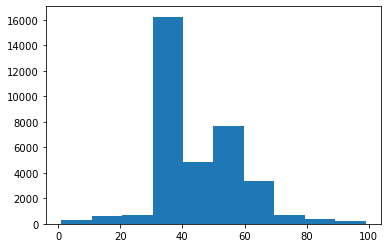

In [19]:
plt.hist(df[df['class'] == ">50k"]["hours_per_week"])
plt.show() 

In [20]:
# regressao linear

In [21]:
df.head()

,ID_adult,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,1,25,private,226802,11th,7,never-married,machine-op-inspct,own-child,black,male,0,0,40,united-states,<=50k
1,2,38,private,89814,hs-grad,9,married-civ-spouse,farming-fishing,husband,white,male,0,0,50,united-states,<=50k
2,3,28,local-gov,336951,assoc-acdm,12,married-civ-spouse,protective-serv,husband,white,male,0,0,40,united-states,>50k
3,4,44,private,160323,some-college,10,married-civ-spouse,machine-op-inspct,husband,black,male,7688,0,40,united-states,>50k
4,5,18,None,103497,some-college,10,never-married,None,own-child,white,female,0,0,30,united-states,<=50k


In [44]:
import numpy as np

In [45]:
novo_valor = list()

for n in list(df['class']):
    
    if n == "<=50k":
        novo_valor.append(0)
    else:
        novo_valor.append(1)

In [46]:
X = np.array(list(df['hours_per_week']))
y = np.array(novo_valor)

In [48]:
X_sm = sm.add_constant(X)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     8014.
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:56:44   Log-Likelihood:                -79199.
No. Observations:              146526   AIC:                         1.584e+05
Df Residuals:                  146524   BIC:                         1.584e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0776      0.004    -20.964      0.000      -0.085      -0.070
x1             0.0078   8.76e-05     89.521      0.000       0.008       0.008
==============================================================================
Omnibus:                    22810.896   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31599.118
Skew:                           1.112   Prob(JB):                         0.00
Kurtosis:                       2.517   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""